# InfographicVQA Exploration
This notebook gives a quick visual feel for the **docvqa_infographics** dataset so we know what the documents, questions, and answers look like before building evaluation pipelines.

In [ ]:
from datasets import load_dataset
dataset = load_dataset("vidore/infovqa_test_subsampled")
train_split = dataset[list(dataset.keys())[0]]
print(f"Loaded splits: {list(dataset.keys())}")
print(f"First split size: {len(train_split)} samples")
print(f"Available fields: {list(train_split.features.keys())}")

Loaded splits: ['test']
First split size: 500 samples
Available fields: ['questionId', 'query', 'answer', 'answer_type', 'image', 'image_filename', 'operation/reasoning', 'ocr', 'data_split', 'source']


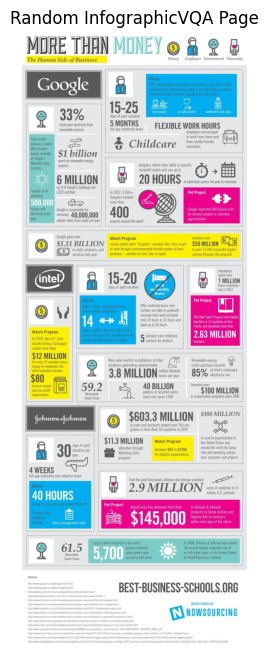

Question: Which parameter is represented by the icon of a hand with heart symbol?
Answer: [missing]


In [8]:
import matplotlib.pyplot as plt
from PIL import Image

sample = train_split.shuffle(seed=42).select(range(1))[0]
image = sample.get("image")
question = (
    sample.get("query")
    or sample.get("question")
    or sample.get("qa", {}).get("question")
    or (sample.get("questions") or [""])[0]
)
raw_answer = sample.get("answer") or sample.get("qa", {}).get("answer")
if isinstance(raw_answer, list):
    answer = raw_answer[0]
elif isinstance(raw_answer, dict):
    answer = raw_answer.get("text") or raw_answer.get("answer") or ""
else:
    answer = raw_answer or ""
answer = answer if isinstance(answer, str) else str(answer)
answer_type = sample.get("answer_type") or sample.get("qa", {}).get("answer_type")
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis("off")
plt.title("Random InfographicVQA Page")
plt.show()
print("Question:", question or "[missing]")
print("Answer:", answer or "[missing]")
if answer_type:
    print("Answer type:", answer_type)


In [10]:
from typing import Any


def get_answer_text(sample: dict[str, Any]) -> str:
    raw = sample.get("answer") or sample.get("qa", {}).get("answer")
    if isinstance(raw, list):
        raw = next((item for item in raw if item), "")
    elif isinstance(raw, dict):
        raw = raw.get("text") or raw.get("answer") or ""
    return raw if isinstance(raw, str) else (raw or "")


answers = [get_answer_text(row) for row in train_split]
non_empty = [ans for ans in answers if ans.strip()]
print(f"Total samples: {len(train_split)}")
print(f"Samples with non-empty answers: {len(non_empty)}")
print(f"Samples missing answers: {len(train_split) - len(non_empty)}")
if non_empty:
    first_idx = next(i for i, ans in enumerate(answers) if ans.strip())
    print("Example answer:", non_empty[0])
    print("Corresponding question:", train_split[first_idx]["query"])


Total samples: 500
Samples with non-empty answers: 0
Samples missing answers: 500
